# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析,从而对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

# 导入数据

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
original_titianic_train = pd.read_csv('./titanic_train.csv')

# 清理数据

In [3]:
original_titianic_train
# 无结构性问题.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
cleaned_titanic_train = original_titianic_train.copy()

In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# age, Cabin, Embarked有缺失,ID应该是字符串,Sex, Embarked, Pclass, Survived应是Category.
cleaned_titanic_train['Sex'] = cleaned_titanic_train['Sex'].astype('category')
cleaned_titanic_train['Embarked'] = cleaned_titanic_train['Embarked'].astype('category')
cleaned_titanic_train['Pclass'] = cleaned_titanic_train['Pclass'].astype('category')
cleaned_titanic_train['Survived'] = cleaned_titanic_train['Survived'].astype('category')
cleaned_titanic_train['PassengerId'] = cleaned_titanic_train['PassengerId'].astype('str')
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


In [7]:
cleaned_titanic_train[cleaned_titanic_train['Age'].isnull()]
# 占比比较大,pandas在计算的时候会自动忽略缺失值,但在线性回归分析的时候需要具体的数据值,所以可以填充值到Age.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
# 填充平均值.
average_age = cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age'] = cleaned_titanic_train['Age'].fillna(average_age)
cleaned_titanic_train['Age'].isnull().sum()

np.int64(0)

In [9]:
# 再看Cabin .
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isnull()]
# 要根据信息建立回归方程.一共只有八百多个,却缺了六百多个,认为船舱号并非关键性的影响生还的因素.可以不将之纳入回归方程进行回归分析.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isnull()]
# 认为登船港口不是关键的影响因素.可以保留.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# 重复
cleaned_titanic_train.duplicated().sum()

np.int64(0)

In [12]:
# 不一致数据.一般出现在分类变量.Embarked,Sex,Pclass,Survived.
cleaned_titanic_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
cleaned_titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
cleaned_titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
cleaned_titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
# 无效或错误数据.
cleaned_titanic_train.describe()
# 没有脱离实际值.

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# 整理数据

sibsp：同乘伴侣/同胞数量
parch：同乘父母/孩子数量
目标是根据乘客信息,预测生还率.
可以计算全家成员的数量,是否会显著影响生存率.

In [17]:
cleaned_titanic_train['FamilyNum'] = cleaned_titanic_train['SibSp'] + cleaned_titanic_train['Parch']

In [18]:
cleaned_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


# 探索数据

在数据分析前先可视化看看,是否存在相关关系.

In [19]:
# 设置色盘set_palette
sns.set_palette('pastel')

In [20]:
# 设置图表尺寸.
plt.rcParams['figure.figsize'] = [7.00, 3.5]
plt.rcParams["figure.autolayout"] = True

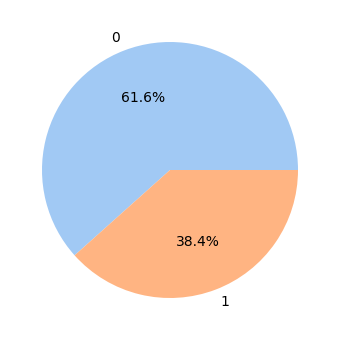

In [21]:
# 先看看有幸存的比例.保留标签和数值比例.
Survived_counts = cleaned_titanic_train['Survived'].value_counts()
Survived_counts_index = Survived_counts.index
plt.pie(Survived_counts, labels = Survived_counts_index, autopct = '%0.1f%%')
plt.show()
# 38%的人幸存.

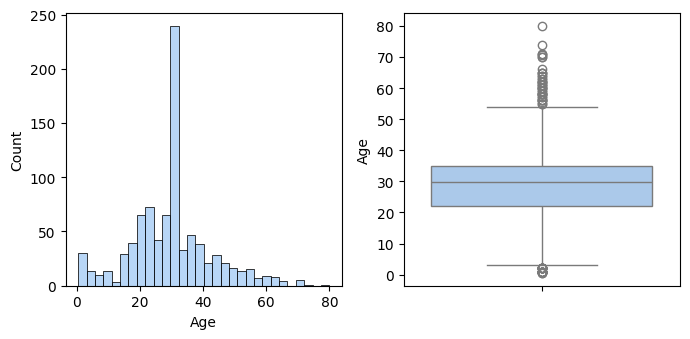

In [22]:
# 看看年龄和遇难的情况.先看看船上各个年龄占的数量如何.
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_titanic_train, x = 'Age', ax = axes[0])
sns.boxplot(cleaned_titanic_train, y = 'Age', ax = axes[1])
plt.show()
# 中位数在30岁附近,年龄主要分布在20岁到30多岁.

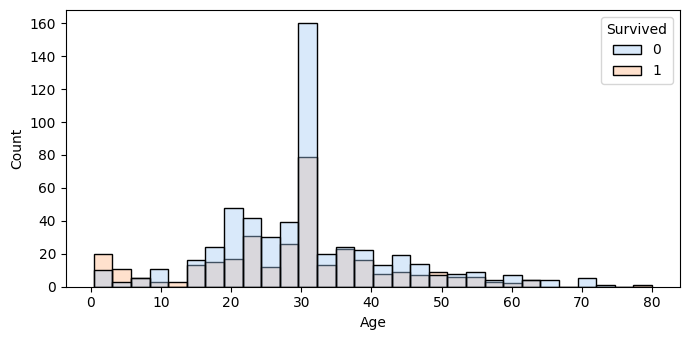

In [23]:
sns.histplot(cleaned_titanic_train, x = 'Age', hue = 'Survived', alpha = 0.4)
plt.show()
#发现船上的人有相当一部分是20岁到30岁左右的,且受到救援存活下来的主要集中在20到30岁左右的人

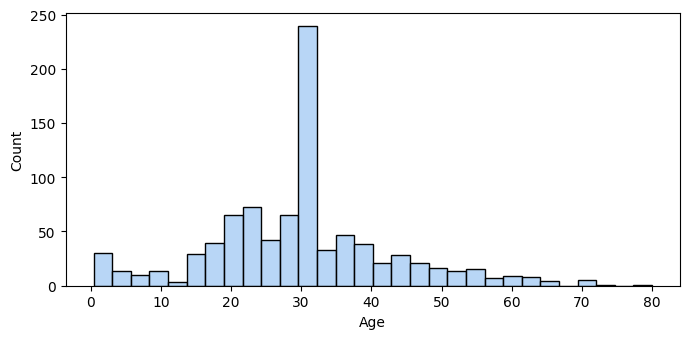

In [24]:
sns.histplot(cleaned_titanic_train, x = 'Age')
plt.show()

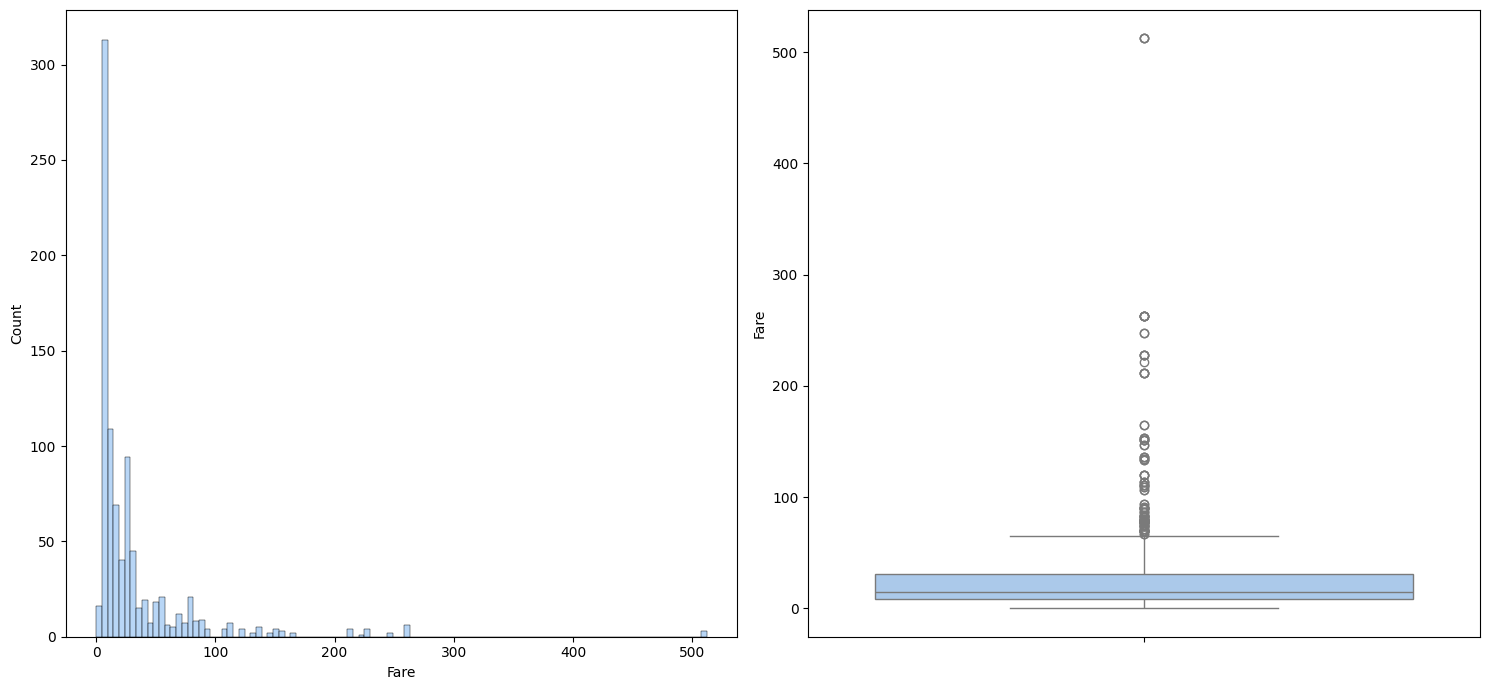

In [25]:
# 看看船票金额fare的分布情况.
figure, axes = plt.subplots(1,2, figsize = [15,7])
sns.histplot(cleaned_titanic_train, x = 'Fare', ax = axes[0])
sns.boxplot(cleaned_titanic_train, y = 'Fare', ax = axes[1])
plt.show()
# 可以看出船票主要的价钱集中在前面30左右,范围大概也不超过一百.

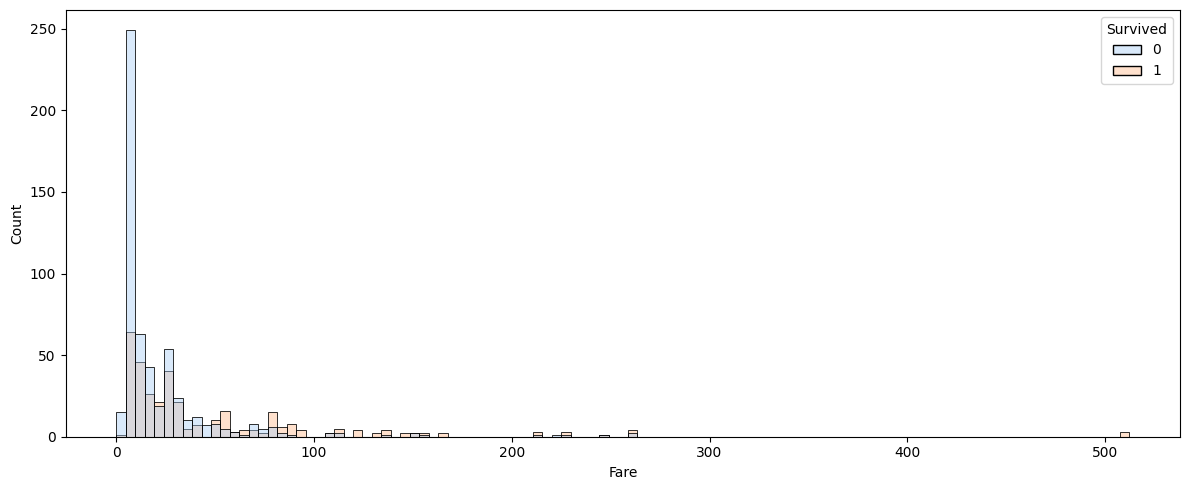

In [26]:
# 再看看幸存的和没幸存的情况.
figure, axes = plt.subplots(1,1, figsize = [12, 5])
sns.histplot(cleaned_titanic_train, x = 'Fare', hue = 'Survived', alpha = 0.4)
plt.show()
# 少数幸存.

# 到此为'Age', 'Fare'是连续型数值变量与是否幸存的关系.

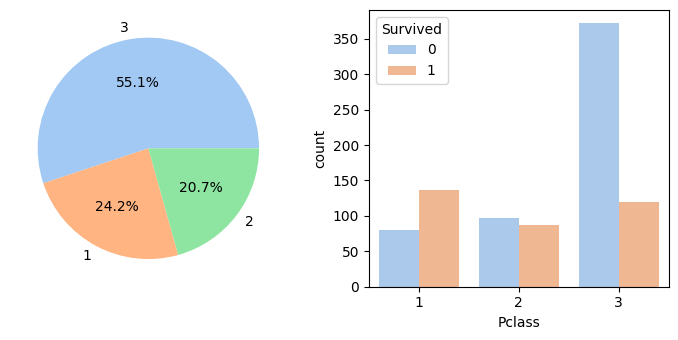

In [27]:
# 开始分类变量与是否幸存的关系.pclass：船舱等级, sex：性别, embarked：登船港口
figure, axes = plt.subplots(1,2)
Pclass_counts = cleaned_titanic_train['Pclass'].value_counts()
Pclass_counts_index = Pclass_counts.index
axes[0].pie(Pclass_counts, labels = Pclass_counts_index, autopct = '%0.1f%%')
sns.countplot(cleaned_titanic_train, x = 'Pclass', hue = 'Survived', ax = axes[1])
plt.show()
# 可以看出在分类里面三等舱是最多的,一等舱和二等舱差不多,同时三等舱里面死的比例也高,而二等舱的死亡比例基本差不多,一等舱死亡比例低,幸存比例高.

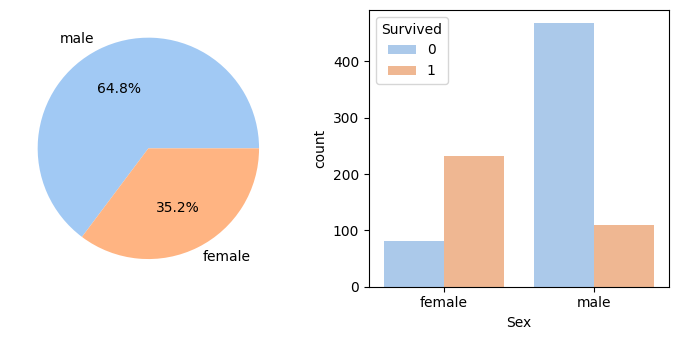

In [28]:
# 看看性别对幸存的影响.
figure, axes = plt.subplots(1,2)
Sex_counts = cleaned_titanic_train['Sex'].value_counts()
Sex_counts_index = Sex_counts.index
axes[0].pie(Sex_counts, labels = Sex_counts_index, autopct = '%0.1f%%')
sns.countplot(cleaned_titanic_train, x = 'Sex', hue = 'Survived', ax = axes[1])
plt.show()
# 可以看到船上女的多,女性里面多数幸存,而男性里面多数死了.

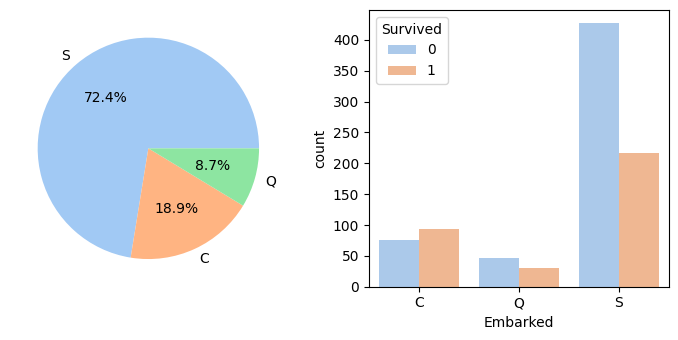

In [29]:
# 来看登船港口与幸存的关系.
figure, axes = plt.subplots(1,2)
Embarked_counts = cleaned_titanic_train['Embarked'].value_counts()
Embarked_counts_index = Embarked_counts.index
axes[0].pie(Embarked_counts, labels = Embarked_counts_index, autopct = '%0.1f%%')
sns.countplot(cleaned_titanic_train, x = 'Embarked', hue ='Survived', ax = axes[1])
plt.show()
# 可以发现多数是在S港口登船的,且在S港口上船的死亡比例最高,在C港口上船的死亡比例最低,在Q港口上船的居中.

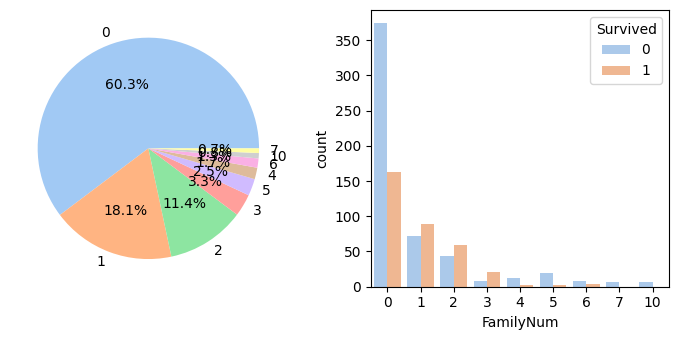

In [30]:
# 家庭成员的人数与是否幸存的关系.
figure, axes = plt.subplots(1,2)
FamilyNum_counts = cleaned_titanic_train['FamilyNum'].value_counts()
FamilyNum_counts_index = FamilyNum_counts.index
axes[0].pie(FamilyNum_counts, labels = FamilyNum_counts_index, autopct = '%0.1f%%')
sns.countplot(cleaned_titanic_train, x = 'FamilyNum', hue = 'Survived')
plt.show()
# 多数情况的家庭人员为0,同时得救率高的是家庭成员为1,2,3的人.

# 分析数据

In [31]:
import statsmodels.api as sm

In [32]:
# 在分析之前需要添加虚拟变量.
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [33]:
# 移除大概率不会影响幸存概率的变量.Name, Ticket, Cabin, PassengerId
lr_titanic_train = lr_titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
lr_titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyNum
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,3
889,1,1,male,26.000000,0,0,30.0000,C,0


In [34]:
lr_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    category
 1   Pclass     891 non-null    category
 2   Sex        891 non-null    category
 3   Age        891 non-null    float64 
 4   SibSp      891 non-null    int64   
 5   Parch      891 non-null    int64   
 6   Fare       891 non-null    float64 
 7   Embarked   889 non-null    category
 8   FamilyNum  891 non-null    int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 38.9 KB


In [35]:
# 添加虚拟变量,将除了Survived之外的分类变量转化为0和1.
lr_titanic_train = pd.get_dummies(lr_titanic_train, drop_first = True, columns = ['Sex', 'Embarked', 'Pclass'], dtype = int)
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,1,0,1


In [36]:
# 划分因变量和自变量.
y = lr_titanic_train['Survived']
x = lr_titanic_train.drop('Survived', axis = 1)

In [37]:
# 检查一下x之间有无强相关性.
x.corr().abs() >0.8
# SibSp和FamilyNum有强相关性,会产生共线性问题.移除一个即可.同时按照常理来看Parch应该也与FamilyNum存在强相关,再仔细看看.

,Age,SibSp,Parch,Fare,FamilyNum,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
Age,True,False,False,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False,False,False
Parch,False,False,True,False,False,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False,False,False
Sex_male,False,False,False,False,False,True,False,False,False,False
Embarked_Q,False,False,False,False,False,False,True,False,False,False
Embarked_S,False,False,False,False,False,False,False,True,False,False
Pclass_2,False,False,False,False,False,False,False,False,True,False
Pclass_3,False,False,False,False,False,False,False,False,False,True


In [38]:
x.corr()
# 结果为0.783 ,接近0.8 , 可以删掉Parch .

,Age,SibSp,Parch,Fare,FamilyNum,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.084153,-0.013855,-0.027121,0.006589,-0.281004
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.114631,-0.026354,0.070941,-0.055932,0.092548
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.245489,-0.081228,0.063036,-0.000734,0.015790
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.182333,-0.117216,-0.166603,-0.118557,-0.413333
FamilyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.200988,-0.058592,0.079977,-0.038594,0.071142
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,1.000000,-0.074115,0.125722,-0.064746,0.137143
Embarked_Q,-0.013855,-0.026354,-0.081228,-0.117216,-0.058592,-0.074115,1.000000,-0.496624,-0.127301,0.237449
Embarked_S,-0.027121,0.070941,0.063036,-0.166603,0.079977,0.125722,-0.496624,1.000000,0.192061,-0.009511
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,-0.064746,-0.127301,0.192061,1.000000,-0.565210
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,0.137143,0.237449,-0.009511,-0.565210,1.000000


In [39]:
x = x.drop(['SibSp', 'Parch'], axis = 1)

In [40]:
# 添加截距.
x = sm.add_constant(x)

In [41]:
# 开始模型.
model = sm.Logit(y, x).fit()
model.summary()
# P值大于0.05的表示该变量与因变量存活无关.包括Fare, Embarked_Q, Embarked_S 应该要删掉再重新来.

Optimization terminated successfully.
         Current function value: 0.440917
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.3379
Time:                        18:51:45   Log-Likelihood:                -392.86
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.179e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0970      0.476      8.606      0.000       3.164       5.030
Age           -0.0385      0.008     -4.903      0.000      -0.054      -0.023
Fare           0.0025      0.002      0.994      0.320      -0.002       0.007
FamilyNum     -0.2211      0.068     -3.230      0.001      -0.355      -0.087
Sex_male      -2.7335      0.200    -13.647      0.000      -3.126      -2.341
Embarked_Q    -0.0680      0.380     -0.179      0.858      -0.813       0.677
Embarked_S    -0.4684      0.239     -1.960      0.050      -0.937      -0.000
Pclass_2      -0.9031      0.297     -3.043      0.002      -1.485      -0.321
Pclass_3      -2.1336      0.297     -7.178      0.000      -2.716      -1.551
==============================================================================
"""

In [43]:
x = x.drop(['Fare', 'Embarked_Q', 'Embarked_S'], axis = 1)

In [44]:
x = sm.add_constant(x)

In [47]:
model = sm.Logit(y, x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.3323
Time:                        18:57:50   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
==============================================================================
"""

In [48]:
# 现在来估计自然系数.
np.exp(-0.0395)
# 系数是负的,每增长一岁,幸存率下降4%左右.
# 由于系数是负数,对应该变量每次进行切换进行增大时,对应的幸存率应该减小,np.exp()计算得出的结果为切换变化后的结果,切换前为1,切换后为 0.96 , 对应减少了 0.04 .

np.float64(0.9612699539905982)

In [49]:
np.exp(-0.2186)
# 家庭成员每增长一个,生存率下降20%左右.

np.float64(0.803643111115195)

In [50]:
np.exp(-2.7854)
# 每从女性切换到男性,幸存率会下降94%左右. 切换前是女性,幸存率为1,切换后为男性,幸存率为0.06 .

np.float64(0.061704402333015156)

In [51]:
np.exp(-1.1798)
# 从二等舱切换到三等舱,幸存率会下降70%左右.

np.float64(0.30734020049483596)

In [52]:
np.exp(	-2.3458)
# 从三等舱切换到一等舱,幸存率会下降91%左右.

np.float64(0.09577055503172162)